In [37]:
from pylab import *
%run "mis_integradores.ipynb"
%matplotlib inline

Hay que resolver $$\frac{d^2\vec{p}}{d\tau^2}=-\frac{\hat{p}}{p^2}$$

In [33]:
def mov_planeta(x,t):
    r3 = (x[0]**2 + x[1]**2)**1.5
    drx = x[2]
    dry = x[3]
    dvrx = -x[0]/r3
    dvry = -x[1]/r3
    return array([drx,dry,dvrx,dvry])

def J_mov_planeta(x,t):
    d_ec = array([0,0,0,0])
    r5 = (x[0]**2 + x[1]**2)**(2.5)
    rxmry = (2*x[0]*x[0] - x[1]*x[1])/r5
    rymrx = (2*x[1]*x[1] - x[0]*x[0])/r5
    rxry = (3*x[0]*x[1]/r5)
    Jac = array([[0,0,1,0],[0,0,0,1],[rxmry,rxry,0,0],[rxry,rymrx,0,0]])
    return d_ec,Jac

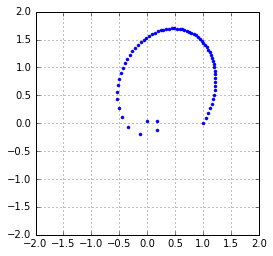

CPU times: user 121 ms, sys: 938 µs, total: 122 ms
Wall time: 121 ms


In [57]:
%%time
r_vr,t = RK2(mov_planeta, [1,0,0.6,0.9], [0,10],0.1)
zoom = 2
xlim([-zoom,zoom]), ylim([-zoom,zoom])
axes().set_aspect('equal'), grid(True)
plot(r_vr[:,0],r_vr[:,1],'.')
show()

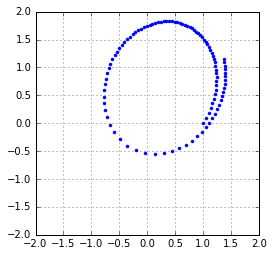

CPU times: user 164 ms, sys: 2.98 ms, total: 167 ms
Wall time: 165 ms


In [56]:
%%time
t,r_vr = integra2(mov_planeta,J_mov_planeta, [1,0,0.6,0.9],[0,10],0.1)
zoom = 2
xlim([-zoom,zoom]), ylim([-zoom,zoom])
axes().set_aspect('equal'), grid(True)
plot(r_vr[:,0],r_vr[:,1],'.')
show()

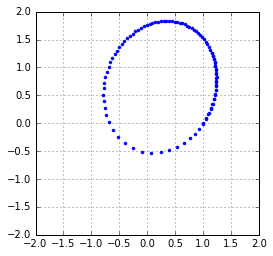

CPU times: user 116 ms, sys: 2.02 ms, total: 118 ms
Wall time: 117 ms


In [54]:
%%time
t, r_vr = RK4(mov_planeta, [1,0,0.6,0.9], [0,10],0.1)
zoom = 2
xlim([-zoom,zoom]), ylim([-zoom,zoom])
axes().set_aspect('equal'), grid(True)
plot(r_vr[:,0],r_vr[:,1],'.')
show()

In [50]:
from scipy.integrate import *

In [51]:
h=0.1
tiempos = arange(0,10+h,h)

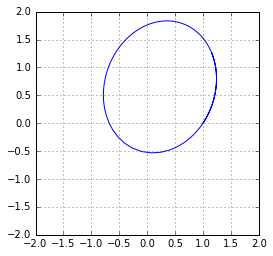

CPU times: user 120 ms, sys: 0 ns, total: 120 ms
Wall time: 118 ms


In [58]:
%%time
r_vr=odeint(mov_planeta, [1,0,0.6,0.9],tiempos)
zoom = 2
xlim([-zoom,zoom]), ylim([-zoom,zoom])
axes().set_aspect('equal'), grid(True)
plot(r_vr[:,0],r_vr[:,1])
show()

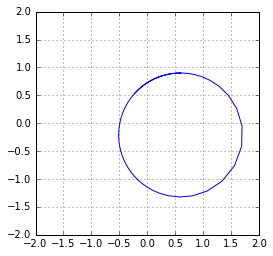

In [60]:
zoom = 2
xlim([-zoom,zoom]), ylim([-zoom,zoom])
axes().set_aspect('equal'), grid(True)
plot(r_vr[:,2],r_vr[:,3])
show()